# MatKit `patch()` Function Examples

This notebook demonstrates the `patch()` function for visualizing finite element meshes, truss structures, and field data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mechanicskit import patch

%matplotlib inline

## Basic Truss Examples

### Setup: Define a simple truss geometry

In [2]:
# Node coordinates (mm)
P = np.array([[0, 0],
              [500, 0],
              [300, 300],
              [600, 300]])

# Element connectivity (1-based node numbers)
edges = np.array([[1, 2],
                  [1, 3],
                  [2, 3],
                  [2, 4],
                  [3, 4]])

### Example 1: Basic Truss Visualization (Uniform Color)

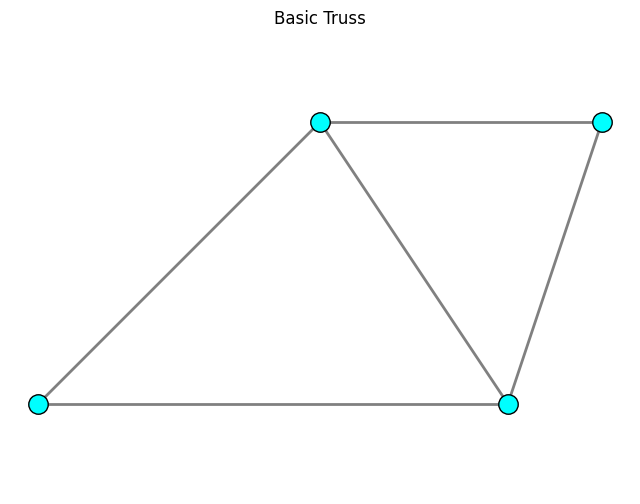

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
patch('Faces', edges, 'Vertices', P, 'LineWidth', 2)
ax.plot(P[:, 0], P[:, 1], 'o', color='cyan',
        markeredgecolor='black', markersize=14)
ax.axis('equal')
ax.axis('off')
ax.set_title('Basic Truss')
plt.show()

### Example 2: Per-Element Colors (Flat Mode)

Visualize element forces with flat coloring (one color per element).

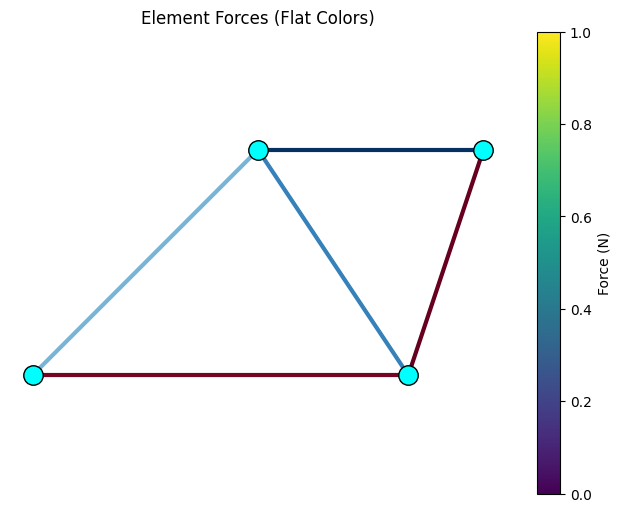

Force range: -9912.1 to 6380.2 N


In [4]:
# Element forces (N)
forces = np.array([6052.76, -5582.25, -7274.51, 6380.16, -9912.07])

fig, ax = plt.subplots(figsize=(8, 6))
patch('Faces', edges, 'Vertices', P,
      'FaceVertexCData', forces,
      'FaceColor', 'flat',
      'LineWidth', 3,
      'cmap', 'RdBu_r')  # Red for tension, blue for compression
ax.plot(P[:, 0], P[:, 1], 'o', color='cyan',
        markeredgecolor='black', markersize=14)
ax.axis('equal')
ax.axis('off')
ax.set_title('Element Forces (Flat Colors)')
plt.colorbar(ax.collections[0], ax=ax, label='Force (N)')
plt.show()

print(f"Force range: {forces.min():.1f} to {forces.max():.1f} N")

### Example 3: Per-Vertex Colors (Interpolated Mode)

Visualize nodal temperatures with interpolated coloring.

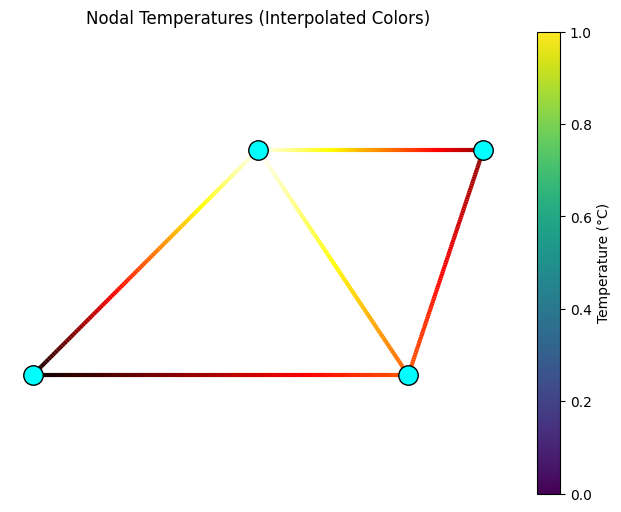

Temperature range: 20.0 to 30.0 °C


In [5]:
# Temperature at each node (°C)
node_temps = np.array([20.0, 25.0, 30.0, 22.0])

fig, ax = plt.subplots(figsize=(8, 6))
patch('Faces', edges, 'Vertices', P,
      'FaceVertexCData', node_temps,
      'FaceColor', 'interp',
      'LineWidth', 3,
      'cmap', 'hot')
ax.plot(P[:, 0], P[:, 1], 'o', color='cyan',
        markeredgecolor='black', markersize=14)
ax.axis('equal')
ax.axis('off')
ax.set_title('Nodal Temperatures (Interpolated Colors)')
plt.colorbar(ax.collections[0], ax=ax, label='Temperature (°C)')
plt.show()

print(f"Temperature range: {node_temps.min():.1f} to {node_temps.max():.1f} °C")

### Example 4: Transparency (FaceAlpha)

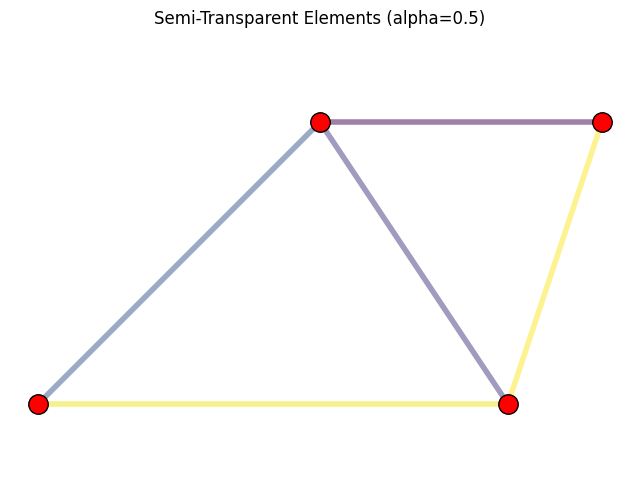

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
patch('Faces', edges, 'Vertices', P,
      'FaceVertexCData', forces,
      'FaceColor', 'flat',
      'LineWidth', 4,
      'FaceAlpha', 0.5)
ax.plot(P[:, 0], P[:, 1], 'o', color='red',
        markeredgecolor='black', markersize=14)
ax.axis('equal')
ax.axis('off')
ax.set_title('Semi-Transparent Elements (alpha=0.5)')
plt.show()

## 3D Examples

### Example 5: 3D Truss

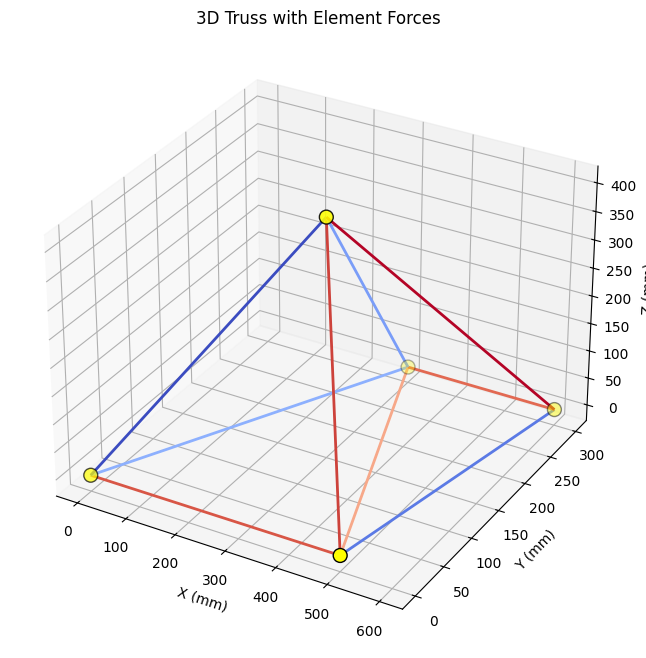

In [7]:
# 3D node coordinates
P_3d = np.array([[0, 0, 0],
                 [500, 0, 0],
                 [300, 300, 0],
                 [600, 300, 0],
                 [300, 150, 400]])

# 3D element connectivity
edges_3d = np.array([[1, 2],
                     [1, 3],
                     [2, 3],
                     [2, 4],
                     [3, 4],
                     [1, 5],
                     [2, 5],
                     [3, 5],
                     [4, 5]])

# 3D element forces
forces_3d = np.array([100, -80, 50, -120, 90, -150, 110, -95, 130])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
patch('Faces', edges_3d, 'Vertices', P_3d,
      'FaceVertexCData', forces_3d,
      'LineWidth', 2,
      'cmap', 'coolwarm',
      ax=ax)
ax.scatter(P_3d[:, 0], P_3d[:, 1], P_3d[:, 2],
          color='yellow', edgecolor='black', s=100)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('3D Truss with Element Forces')
plt.show()

## Surface Element Examples

### Example 6: 2D Surface Elements (Triangles)

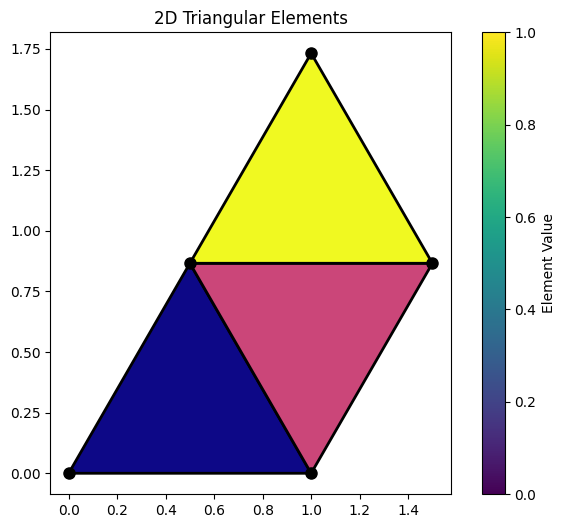

In [19]:
# Triangular mesh vertices
vertices_2d = np.array([[0, 0],
                        [1, 0],
                        [0.5, 0.866],
                        [1.5, 0.866],
                        [1, 1.732]])

# Triangle connectivity
faces_2d = np.array([[1, 2, 3],
                     [2, 4, 3],
                     [3, 4, 5]])

# Per-element colors
face_colors = np.array([0.2, 0.5, 0.8])

fig, ax = plt.subplots(figsize=(8, 6))
patch('Faces', faces_2d, 'Vertices', vertices_2d,
      'FaceVertexCData', face_colors,
      'FaceColor', 'flat',
      'EdgeColor', 'black',
      'LineWidth', 2,
      'cmap', 'plasma')
ax.plot(vertices_2d[:, 0], vertices_2d[:, 1], 'ko', markersize=8)
ax.set_aspect('equal')
ax.set_title('2D Triangular Elements')
plt.colorbar(ax.collections[0], ax=ax, label='Element Value')
plt.show()

### Example 7: 3D Surface Element (Quad with Transparency)

/home/mirza/python/MechanicsKit/mechanicskit/patch.py:812: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(Vertices[:, 2].min(), Vertices[:, 2].max())


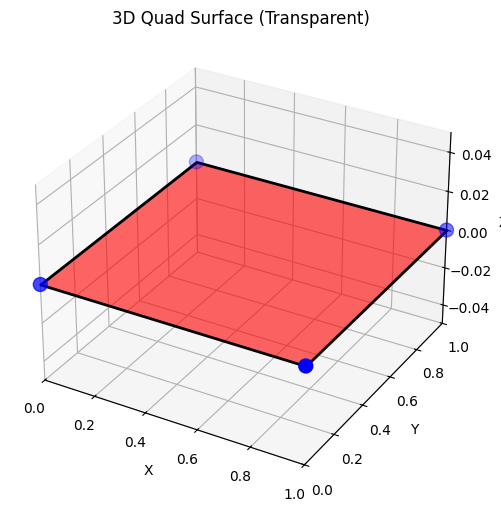

In [9]:
# 3D quad vertices
vertices_3d_surf = np.array([[0, 0, 0],
                             [1, 0, 0],
                             [1, 1, 0],
                             [0, 1, 0]])

# Quad face
faces_3d_surf = np.array([[1, 2, 3, 4]])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
patch('Faces', faces_3d_surf, 'Vertices', vertices_3d_surf,
      'FaceColor', 'red',
      'FaceAlpha', 0.6,
      'EdgeColor', 'black',
      'LineWidth', 2,
      ax=ax)
ax.scatter(vertices_3d_surf[:, 0], vertices_3d_surf[:, 1], vertices_3d_surf[:, 2],
          color='blue', s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Quad Surface (Transparent)')
plt.show()

## Advanced Examples - Quad Meshes and Field Visualization

### Setup: Define a quad mesh geometry

In [10]:
# More complex mesh for advanced examples
P_quad = np.array([[0, 0],
                   [3, 0],
                   [3, 1.2],
                   [0, 1.2],
                   [0.7, 0],
                   [1.6, 0],
                   [2.5, 0],
                   [3, 0.5],
                   [2.3, 1.2],
                   [1.5, 1.2],
                   [0.6, 1.2],
                   [0, 0.5],
                   [0.55, 0.4],
                   [1.45, 0.6],
                   [2.4, 0.45]])

nodes_quad = np.array([[1, 5, 13, 12],
                       [12, 13, 11, 4],
                       [5, 6, 14, 13],
                       [13, 14, 10, 11],
                       [14, 15, 9, 10],
                       [6, 7, 15, 14],
                       [7, 2, 8, 15],
                       [15, 8, 3, 9]])

### Example 8: Quad Element Mesh with Labels

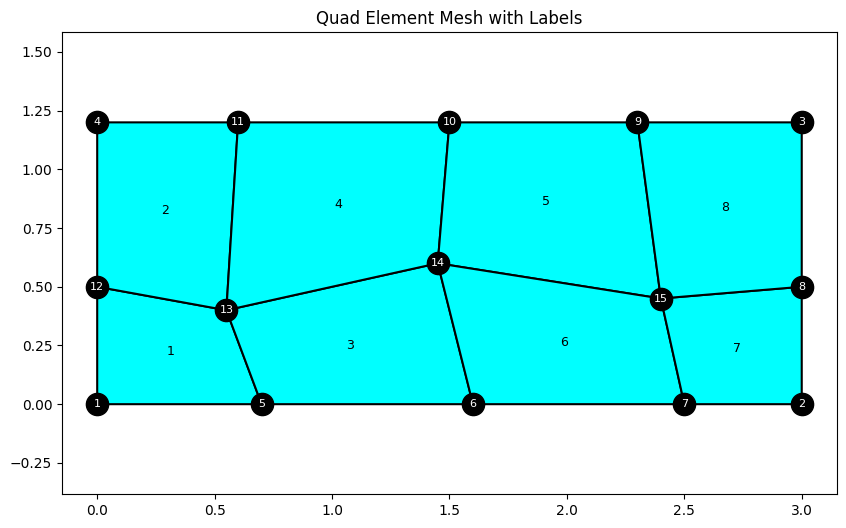

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Draw mesh with cyan faces
patch('Faces', nodes_quad, 'Vertices', P_quad,
      'FaceColor', 'cyan',
      'EdgeColor', 'black',
      'EdgeAlpha', 0.3,
      'LineWidth', 1.5,
      ax=ax)

# Plot nodes
ax.plot(P_quad[:, 0], P_quad[:, 1], 'ok', markerfacecolor='black', markersize=16)

# Label nodes
for i in range(len(P_quad)):
    ax.text(P_quad[i, 0], P_quad[i, 1], str(i+1),
            color='w', fontsize=8, ha='center', va='center')

# Label elements at their centroids
for iel in range(len(nodes_quad)):
    element_nodes = nodes_quad[iel] - 1  # Convert to 0-based
    xm = np.mean(P_quad[element_nodes, 0])
    ym = np.mean(P_quad[element_nodes, 1])
    ax.text(xm, ym, str(iel+1), fontsize=9, ha='center', va='center')

ax.axis('equal')
ax.set_title('Quad Element Mesh with Labels')
plt.show()

### Example 9: Displacement Field Visualization

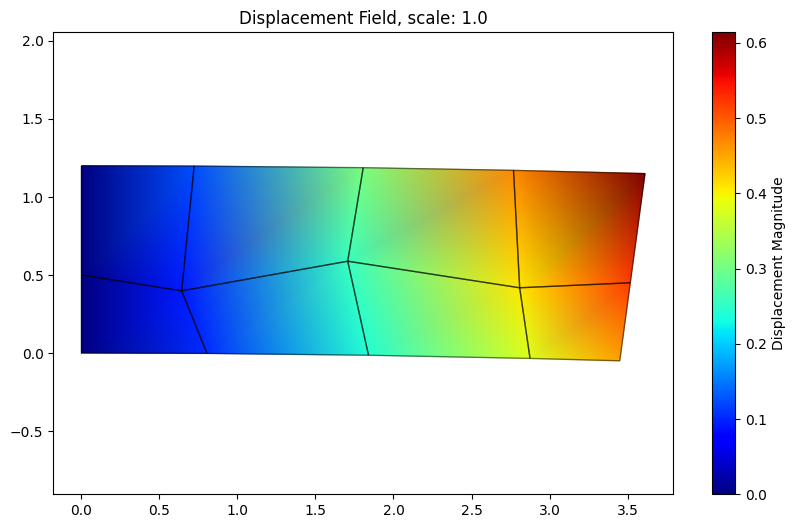

Displacement range: 0.0000 to 0.6140


In [12]:
# Create synthetic displacement field (simulating FEM results)
np.random.seed(42)
u_flat = np.zeros(2 * len(P_quad))

# Simulate bending: displacement increases with x, varies with y
for i in range(len(P_quad)):
    x, y = P_quad[i]
    u_flat[2*i] = 0.15 * x * (1 + 0.3 * y)      # x-displacement
    u_flat[2*i+1] = -0.05 * x**2 / 9            # y-displacement

# Convert to nodal displacement array (n_nodes, 2)
U = np.column_stack([u_flat[0::2], u_flat[1::2]])

# Compute displacement magnitude at each node
UR = np.sqrt(np.sum(U**2, axis=1))

# Scale factor for visualization
scale = 1.0

fig, ax = plt.subplots(figsize=(10, 6))

# Draw deformed mesh with displacement magnitude colors
patch('Faces', nodes_quad, 'Vertices', P_quad + U * scale,
      'FaceVertexCData', UR,
      'FaceColor', 'interp',
      'EdgeColor', 'black',
      'EdgeAlpha', 0.5,
      'LineWidth', 1.0,
      'cmap', 'jet',
      ax=ax)

ax.axis('equal')
ax.set_title(f'Displacement Field, scale: {scale}')
plt.colorbar(ax.collections[0], ax=ax, label='Displacement Magnitude')
plt.show()

print(f"Displacement range: {UR.min():.4f} to {UR.max():.4f}")

### Example 10: Element Stress Field

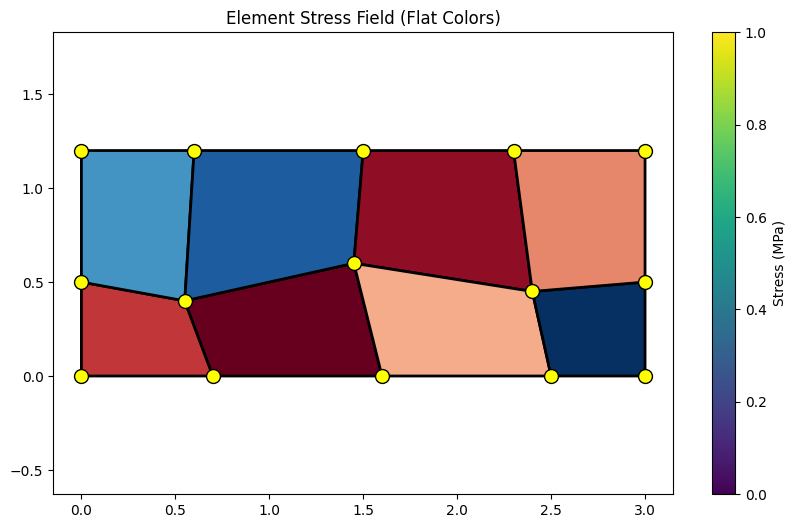

Stress range: -150.0 to 200.0 MPa


In [13]:
# Create synthetic stress data (one value per element)
element_stresses = np.array([150, -80, 200, -120, 180, 90, -150, 110])

fig, ax = plt.subplots(figsize=(10, 6))

# Draw mesh with per-element colors
patch('Faces', nodes_quad, 'Vertices', P_quad,
      'FaceVertexCData', element_stresses,
      'FaceColor', 'flat',
      'EdgeColor', 'black',
      'LineWidth', 2,
      'cmap', 'RdBu_r',  # Red for tension, blue for compression
      ax=ax)

# Plot nodes
ax.plot(P_quad[:, 0], P_quad[:, 1], 'ok', markerfacecolor='yellow',
        markeredgecolor='black', markersize=10)

ax.axis('equal')
ax.set_title('Element Stress Field (Flat Colors)')
plt.colorbar(ax.collections[0], ax=ax, label='Stress (MPa)')
plt.show()

print(f"Stress range: {element_stresses.min():.1f} to {element_stresses.max():.1f} MPa")

### Example 11: Temperature Field (Interpolated)

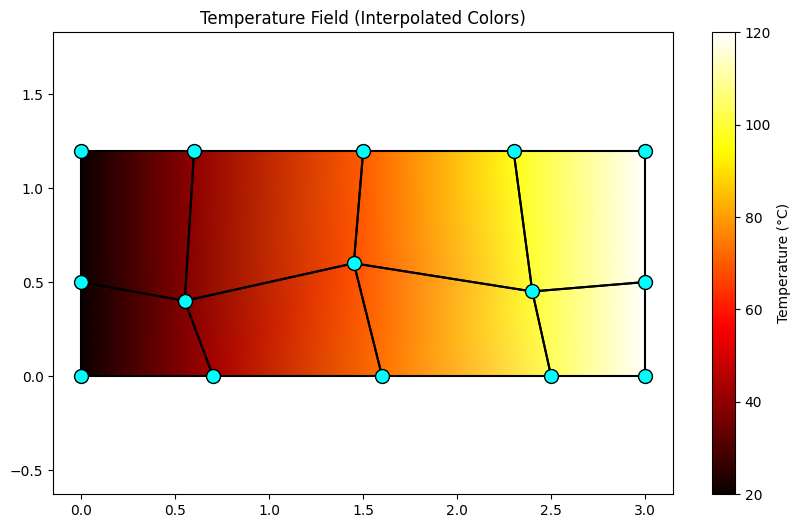

Temperature range: 20.0 to 120.0 °C


In [14]:
# Create synthetic temperature data (one value per node)
node_temps_quad = np.zeros(len(P_quad))
for i in range(len(P_quad)):
    x, y = P_quad[i]
    # Temperature increases from left to right
    node_temps_quad[i] = 100 * (x / 3.0) + 20

fig, ax = plt.subplots(figsize=(10, 6))

# Draw mesh with interpolated nodal temperatures
patch('Faces', nodes_quad, 'Vertices', P_quad,
      'FaceVertexCData', node_temps_quad,
      'FaceColor', 'interp',
      'EdgeColor', 'black',
      'LineWidth', 1.5,
      'cmap', 'hot',
      ax=ax)

# Plot nodes
ax.plot(P_quad[:, 0], P_quad[:, 1], 'ok', markerfacecolor='cyan',
        markeredgecolor='black', markersize=10)

ax.axis('equal')
ax.set_title('Temperature Field (Interpolated Colors)')
plt.colorbar(ax.collections[0], ax=ax, label='Temperature (°C)')
plt.show()

print(f"Temperature range: {node_temps_quad.min():.1f} to {node_temps_quad.max():.1f} °C")

### Example 12: Displacement Comparison (Multiple Scales)

/tmp/ipykernel_44362/3707156224.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


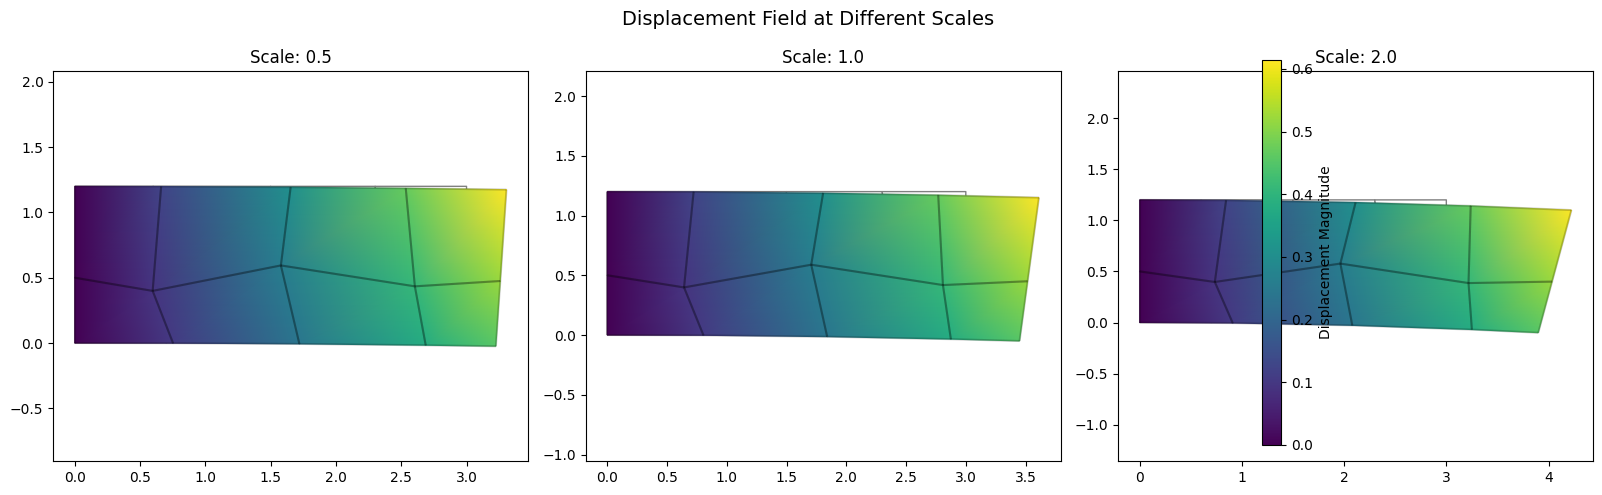

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

collections = []
for idx, scale in enumerate([0.5, 1.0, 2.0]):
    ax = axes[idx]

    # Original mesh (light gray)
    patch('Faces', nodes_quad, 'Vertices', P_quad,
          'FaceColor', 'white',
          'EdgeColor', 'gray',
          'EdgeAlpha', 0.3,
          'LineWidth', 1.0,
          ax=ax)

    # Deformed mesh
    P_def = P_quad + U * scale
    pc = patch('Faces', nodes_quad, 'Vertices', P_def,
               'FaceVertexCData', UR,
               'FaceColor', 'interp',
               'EdgeColor', 'black',
               'EdgeAlpha', 0.2,
               'LineWidth', 1.5,
               'cmap', 'viridis',
               ax=ax)
    collections.append(pc)

    ax.axis('equal')
    ax.set_title(f'Scale: {scale}')

# Add shared colorbar
fig.colorbar(collections[0], ax=axes.ravel().tolist(), label='Displacement Magnitude', pad=0.02)
plt.suptitle('Displacement Field at Different Scales', fontsize=14)
plt.tight_layout()
plt.show()

### Example 13: FaceAlpha Variations

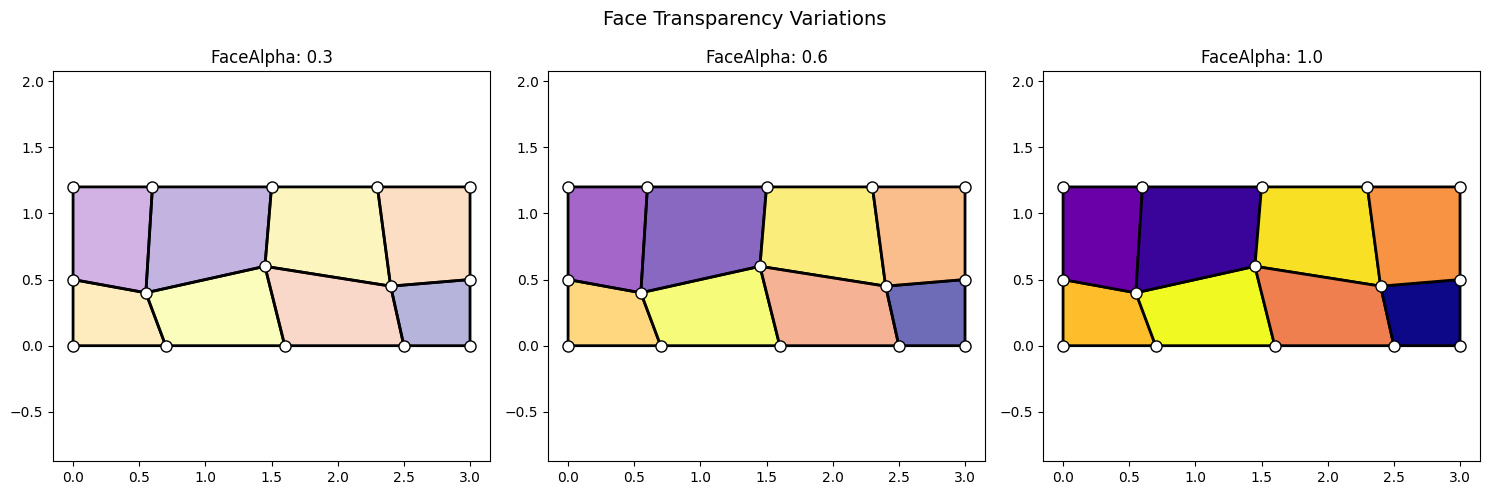

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, alpha in enumerate([0.3, 0.6, 1.0]):
    ax = axes[idx]

    patch('Faces', nodes_quad, 'Vertices', P_quad,
          'FaceVertexCData', element_stresses,
          'FaceColor', 'flat',
          'FaceAlpha', alpha,
          'EdgeColor', 'black',
          'LineWidth', 2,
          'cmap', 'plasma',
          ax=ax)

    ax.plot(P_quad[:, 0], P_quad[:, 1], 'ok', markerfacecolor='white',
            markeredgecolor='black', markersize=8)

    ax.axis('equal')
    ax.set_title(f'FaceAlpha: {alpha}')

plt.suptitle('Face Transparency Variations', fontsize=14)
plt.tight_layout()
plt.show()

## Summary

The `patch()` function provides flexible visualization for FEM:

### Key Parameters:
- **Faces**: Element connectivity (1-based node numbers)
- **Vertices**: Node coordinates
- **FaceVertexCData**: Data for coloring (per-element or per-node)
- **FaceColor**: Color mode (`'flat'`, `'interp'`, or explicit color)
- **FaceAlpha**: Transparency (0.0 to 1.0)
- **EdgeColor**: Edge color
- **LineWidth**: Edge thickness
- **cmap**: Colormap name (e.g., `'viridis'`, `'hot'`, `'RdBu_r'`)

### Color Modes:
- **`'flat'`**: One color per element (use with per-element data)
- **`'interp'`**: Interpolated colors (use with per-node data)

### Typical Use Cases:
- Element forces/stresses: Use `FaceColor='flat'` with per-element data
- Nodal displacements/temperatures: Use `FaceColor='interp'` with per-node data
- Deformed shapes: Add displacements to vertices: `P + U * scale`